<a href="https://colab.research.google.com/github/09bassOp/stock-prediction/blob/master/week2_regressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup & Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=b63d7ee65082b75c9feedb6baee6c69f13d157c9ac2388925a26ac3a1e82e365
  Stored in directory: /tmp/pip-ephem-wheel-cache-78pcp5fw/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [4]:

#Mount folder to save and retrieve outputs
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/courseWork2"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/courseWork2


#Import Data and Discovery

In [28]:

df_full = pdr.get_data_yahoo("AAPL", start="2017-01-01").reset_index()

%cd "/content/drive/My Drive/courseWork2"
df_full.to_csv('output/AAPL.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded
/content/drive/My Drive/courseWork2


In [19]:
df_full.shape

(677, 6)

In [10]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,115.800003,116.330002,114.760002,116.150002,111.286987,28781900
1,2017-01-04,115.849998,116.510002,115.750000,116.019997,111.162437,21118100
2,2017-01-05,115.919998,116.860001,115.809998,116.610001,111.727715,22193600
3,2017-01-06,116.779999,118.160004,116.470001,117.910004,112.973305,31751900
4,2017-01-09,117.949997,119.430000,117.940002,118.989998,114.008080,33561900


In [11]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,677.000000,677.000000,677.000000,677.000000,677.000000,6.770000e+02
mean,174.777341,176.332807,173.306322,174.871758,171.450970,3.013650e+07
std,25.915451,26.306501,25.538181,25.890130,26.905295,1.302061e+07
min,115.800003,116.330002,114.760002,116.019997,111.162437,1.136200e+07
25%,155.020004,156.330002,153.779999,155.320007,151.044632,2.121840e+07
50%,173.500000,174.949997,172.080002,173.970001,169.736588,2.660540e+07
75%,193.070007,194.970001,191.919998,193.460007,191.172577,3.500530e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,1.119850e+08


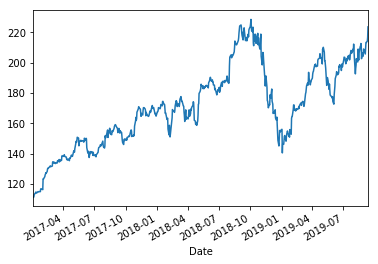

In [20]:

df_full["Adj Close"].plot()

# Data Preproccessing
(Formatting)

In [30]:

df_full.set_index("Date", inplace=True)

KeyError: ignored

In [0]:

window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [40]:
y_test.shape
x_test.shape

(129, 32)

#Modeling

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

## Baseline

In [0]:
y_pred_lag=np.roll(y_test,1)

In [45]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.7939
Mean Squared Error: 27.254
Root Mean Squared Error: 5.2205


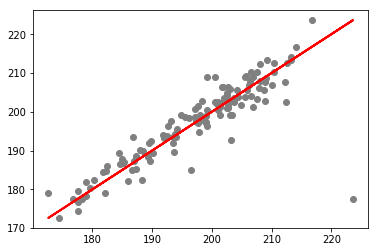

In [46]:
get_plot(y_pred_lag)

## Linear Regression

In [47]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [50]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.6523
Mean Squared Error: 12.2296
Root Mean Squared Error: 3.4971


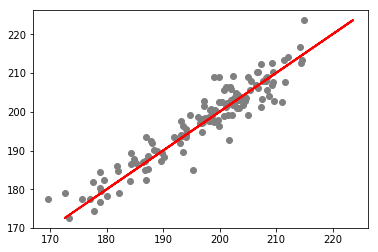

In [51]:
get_plot(y_pred_lr)

In [52]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.6523
Mean Squared Error: 12.2296
Root Mean Squared Error: 3.4971


## Method #1- Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [55]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.6522
Mean Squared Error: 12.2284
Root Mean Squared Error: 3.4969


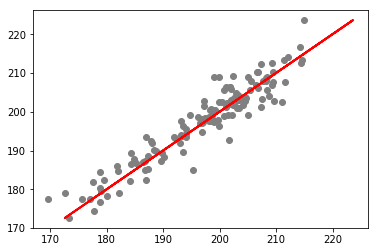

In [56]:
get_plot(y_pred_ridge)

## Gradient Boosting Trees

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [0]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.1889
Mean Squared Error: 15.3025
Root Mean Squared Error: 3.9118


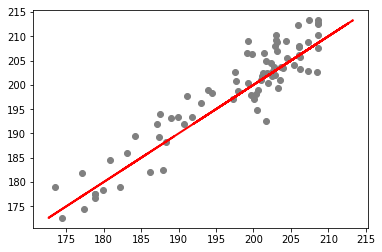

In [0]:
get_plot(y_pred_gb)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

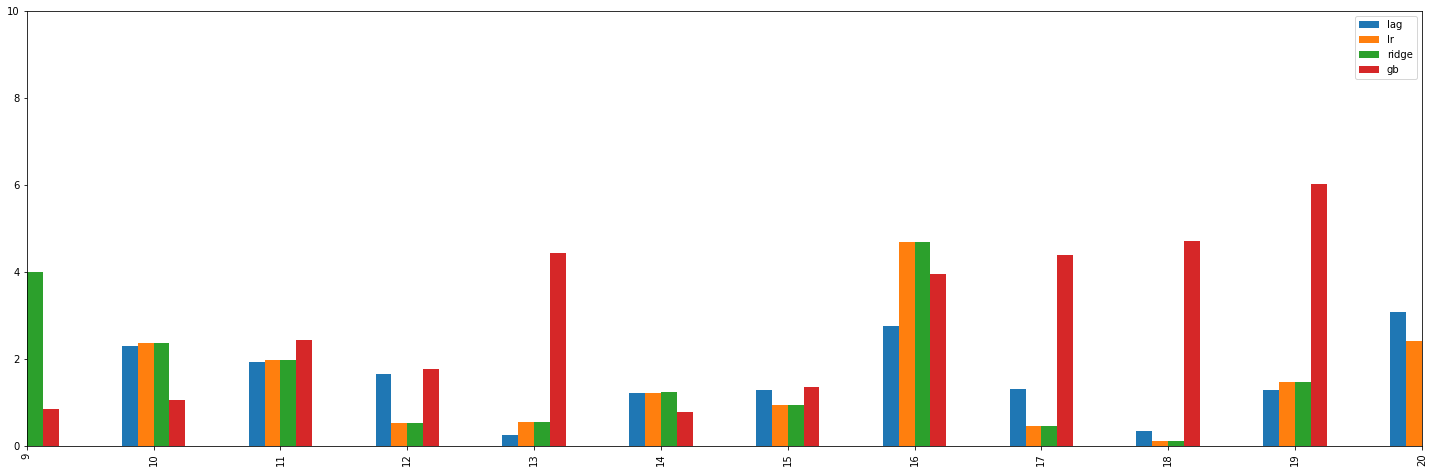

In [64]:
df_comp.plot.bar(figsize=(25, 8))
plt.ylim(0,10)
plt.xlim(9,20)

# Resources



*   [An Introduction to Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370)
*   [Colab: Agent Trading](https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW#scrollTo=Lo2Pg-dcY5_U)
*   [In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)
*   [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)






